# Housing Prices Machine Learning

## Dataset Details

- **File Name**: `house_2.csv`
- **Description**:  
  This dataset contains property-related information including:  
  - Bedroom count  
  - Net square meters  (total usable interior space)
  - Distance to city center and metro station  
  - Floor number  of housing unit within building
  - Age of the property  
  - Price (Rent) 
- **Source**: [https://www.kaggle.com/datasets/rukenmissonnier/final-house?select=house.csv](#)








## Import Data

In [164]:
import pandas as pd



data = pd.read_csv('house 2.csv')

data.head()





,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722570
2,1,36.980709,692.09,111.224999,24,24,98112.519940
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


# Organizaing Data

In [165]:
data.columns = ['Bedroom_Count', 'Net_Square_Meters', 'City_Center_Distance (Miles)', 
                'Metro_Distance (Miles)', 'Floor_Number', 'Age', 'Price USD']

data['City_Center_Distance (Miles)'] *= -1
data['Metro_Distance (Miles)'] *= -1

# Sort by 'Price USD' in descending order
data.sort_values(by='Price USD', ascending=False, inplace=True)

# Round all numeric values to 2 decimal places
data = data.round(2)

# Display the first few rows
data.head()


,Bedroom_Count,Net_Square_Meters,City_Center_Distance (Miles),Metro_Distance (Miles),Floor_Number,Age,Price USD
3530,17,750.97,-402.62,-40.99,1,80,118134.77
3476,11,526.44,-128.82,-108.90,2,2,116379.47
3527,14,600.29,-499.92,-84.71,1,2,115050.43
3525,13,421.13,-516.61,-88.53,1,4,111096.20
3517,12,547.10,-181.35,-79.22,2,94,110772.84


## Organization Summary

I Changed Column names to be more descriptive. I also sorted the values by price in descending order. Also I rounded the data to two decimal points only.

## Analyzing Data

### Frequency Chart to Show Distribution of Property Prices

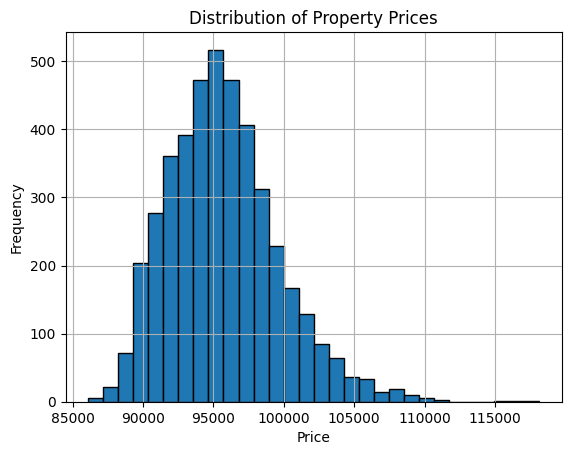

In [166]:
import matplotlib.pyplot as plt

data['Price USD'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Finding out Important Statistics for Varaibles

In [167]:
print(data.describe())

       Bedroom_Count  Net_Square_Meters  City_Center_Distance (Miles)  \
count    4308.000000        4308.000000                   4308.000000   
mean        3.732823         118.941332                  -1090.544301   
std         2.476989          95.469699                    555.325830   
min         1.000000          10.240000                  -1999.840000   
25%         2.000000          52.240000                  -1554.280000   
50%         3.000000          91.825000                  -1143.135000   
75%         5.000000         150.990000                   -635.897500   
max        17.000000         750.970000                    -11.800000   

       Metro_Distance (Miles)  Floor_Number          Age      Price USD  
count             4308.000000   4308.000000  4308.000000    4308.000000  
mean              -105.665325      9.397168    48.576834   95701.196193  
std                 60.750838      7.517018    27.621465    3919.823990  
min               -330.280000      1.000000   

### Scatter Plots to show the relationship between different Varaibles and house prices

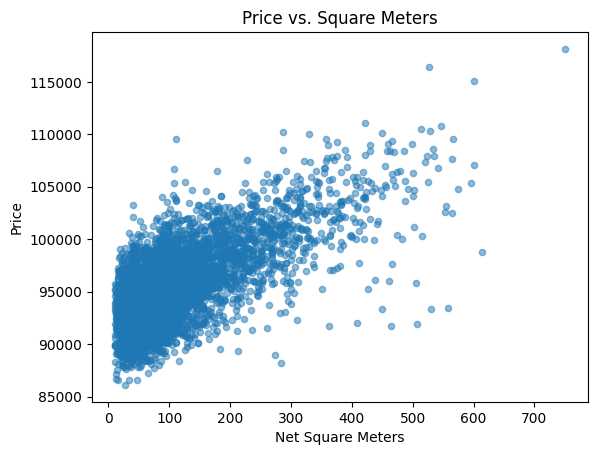

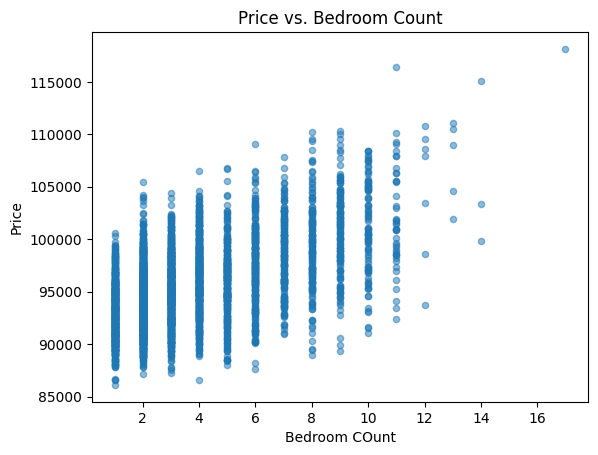

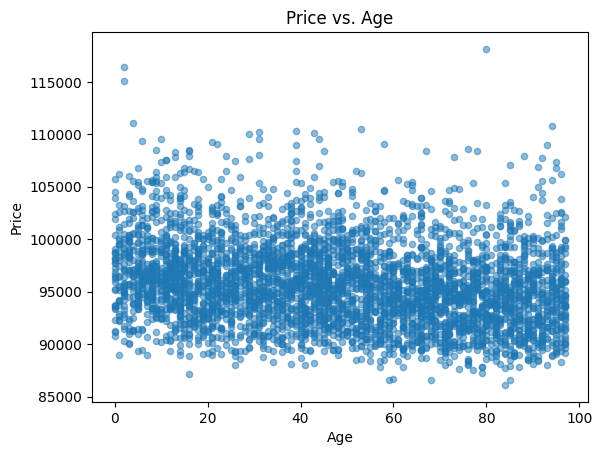

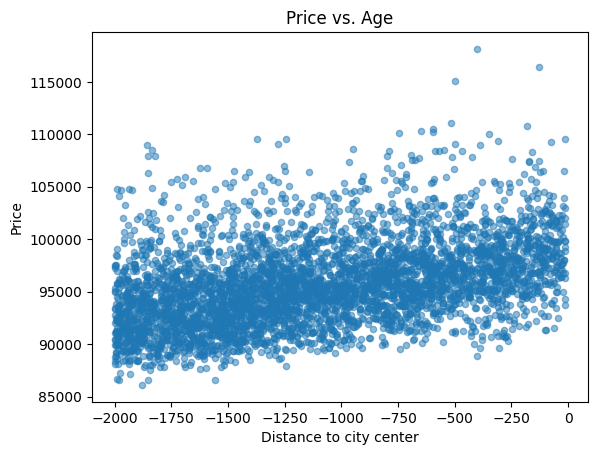

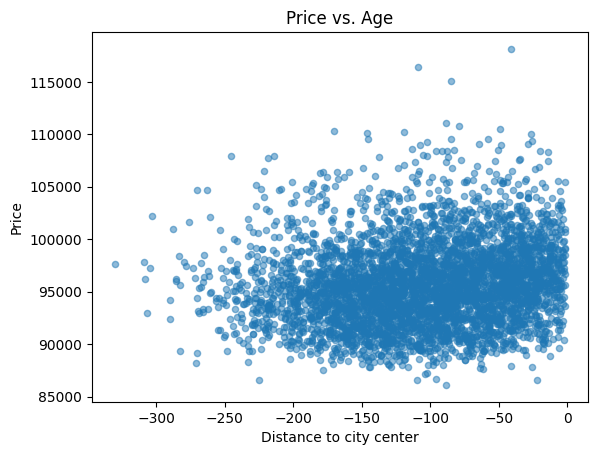

In [168]:
data.plot.scatter(x='Net_Square_Meters', y='Price USD', alpha=0.5)
plt.title('Price vs. Square Meters')
plt.xlabel('Net Square Meters')
plt.ylabel('Price')
plt.show()

data.plot.scatter(x='Bedroom_Count', y='Price USD', alpha=0.5)
plt.title('Price vs. Bedroom Count')
plt.xlabel('Bedroom COunt')
plt.ylabel('Price')
plt.show()

data.plot.scatter(x='Age', y='Price USD', alpha=0.5)
plt.title('Price vs. Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

data.plot.scatter(x='City_Center_Distance (Miles)', y='Price USD', alpha=0.5)
plt.title('Price vs. City Center Distance')
plt.xlabel('Distance to city center')
plt.ylabel('Price')
plt.show()

data.plot.scatter(x='Metro_Distance (Miles)', y='Price USD', alpha=0.5)
plt.title('Price vs. Metro distance')
plt.xlabel('Distance to city metro')
plt.ylabel('Price')
plt.show()



### Correlation between Varaibles

In [169]:
print(data.corr())


                              Bedroom_Count  Net_Square_Meters  \
Bedroom_Count                      1.000000           0.753441   
Net_Square_Meters                  0.753441           1.000000   
City_Center_Distance (Miles)       0.014428           0.008849   
Metro_Distance (Miles)            -0.022111          -0.031006   
Floor_Number                      -0.534736          -0.409224   
Age                               -0.056951          -0.050120   
Price USD                          0.552405           0.681987   

                              City_Center_Distance (Miles)  \
Bedroom_Count                                     0.014428   
Net_Square_Meters                                 0.008849   
City_Center_Distance (Miles)                      1.000000   
Metro_Distance (Miles)                            0.581199   
Floor_Number                                     -0.022840   
Age                                              -0.011684   
Price USD                            

### Heatmap

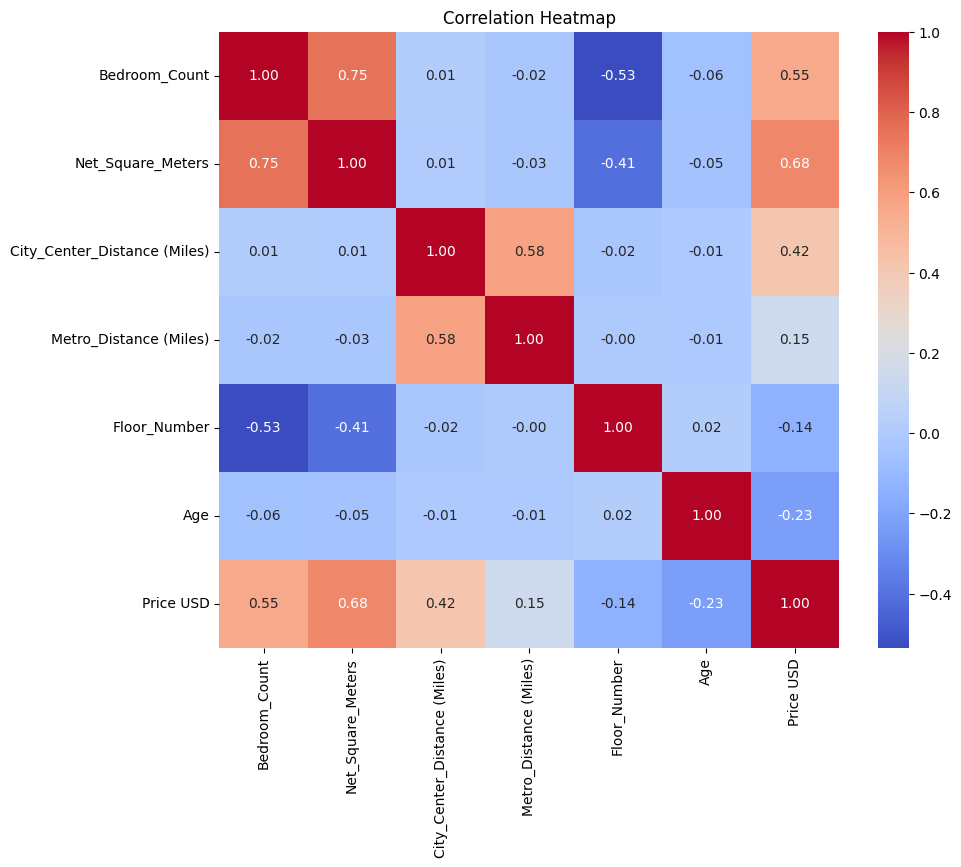

In [170]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Pairplot

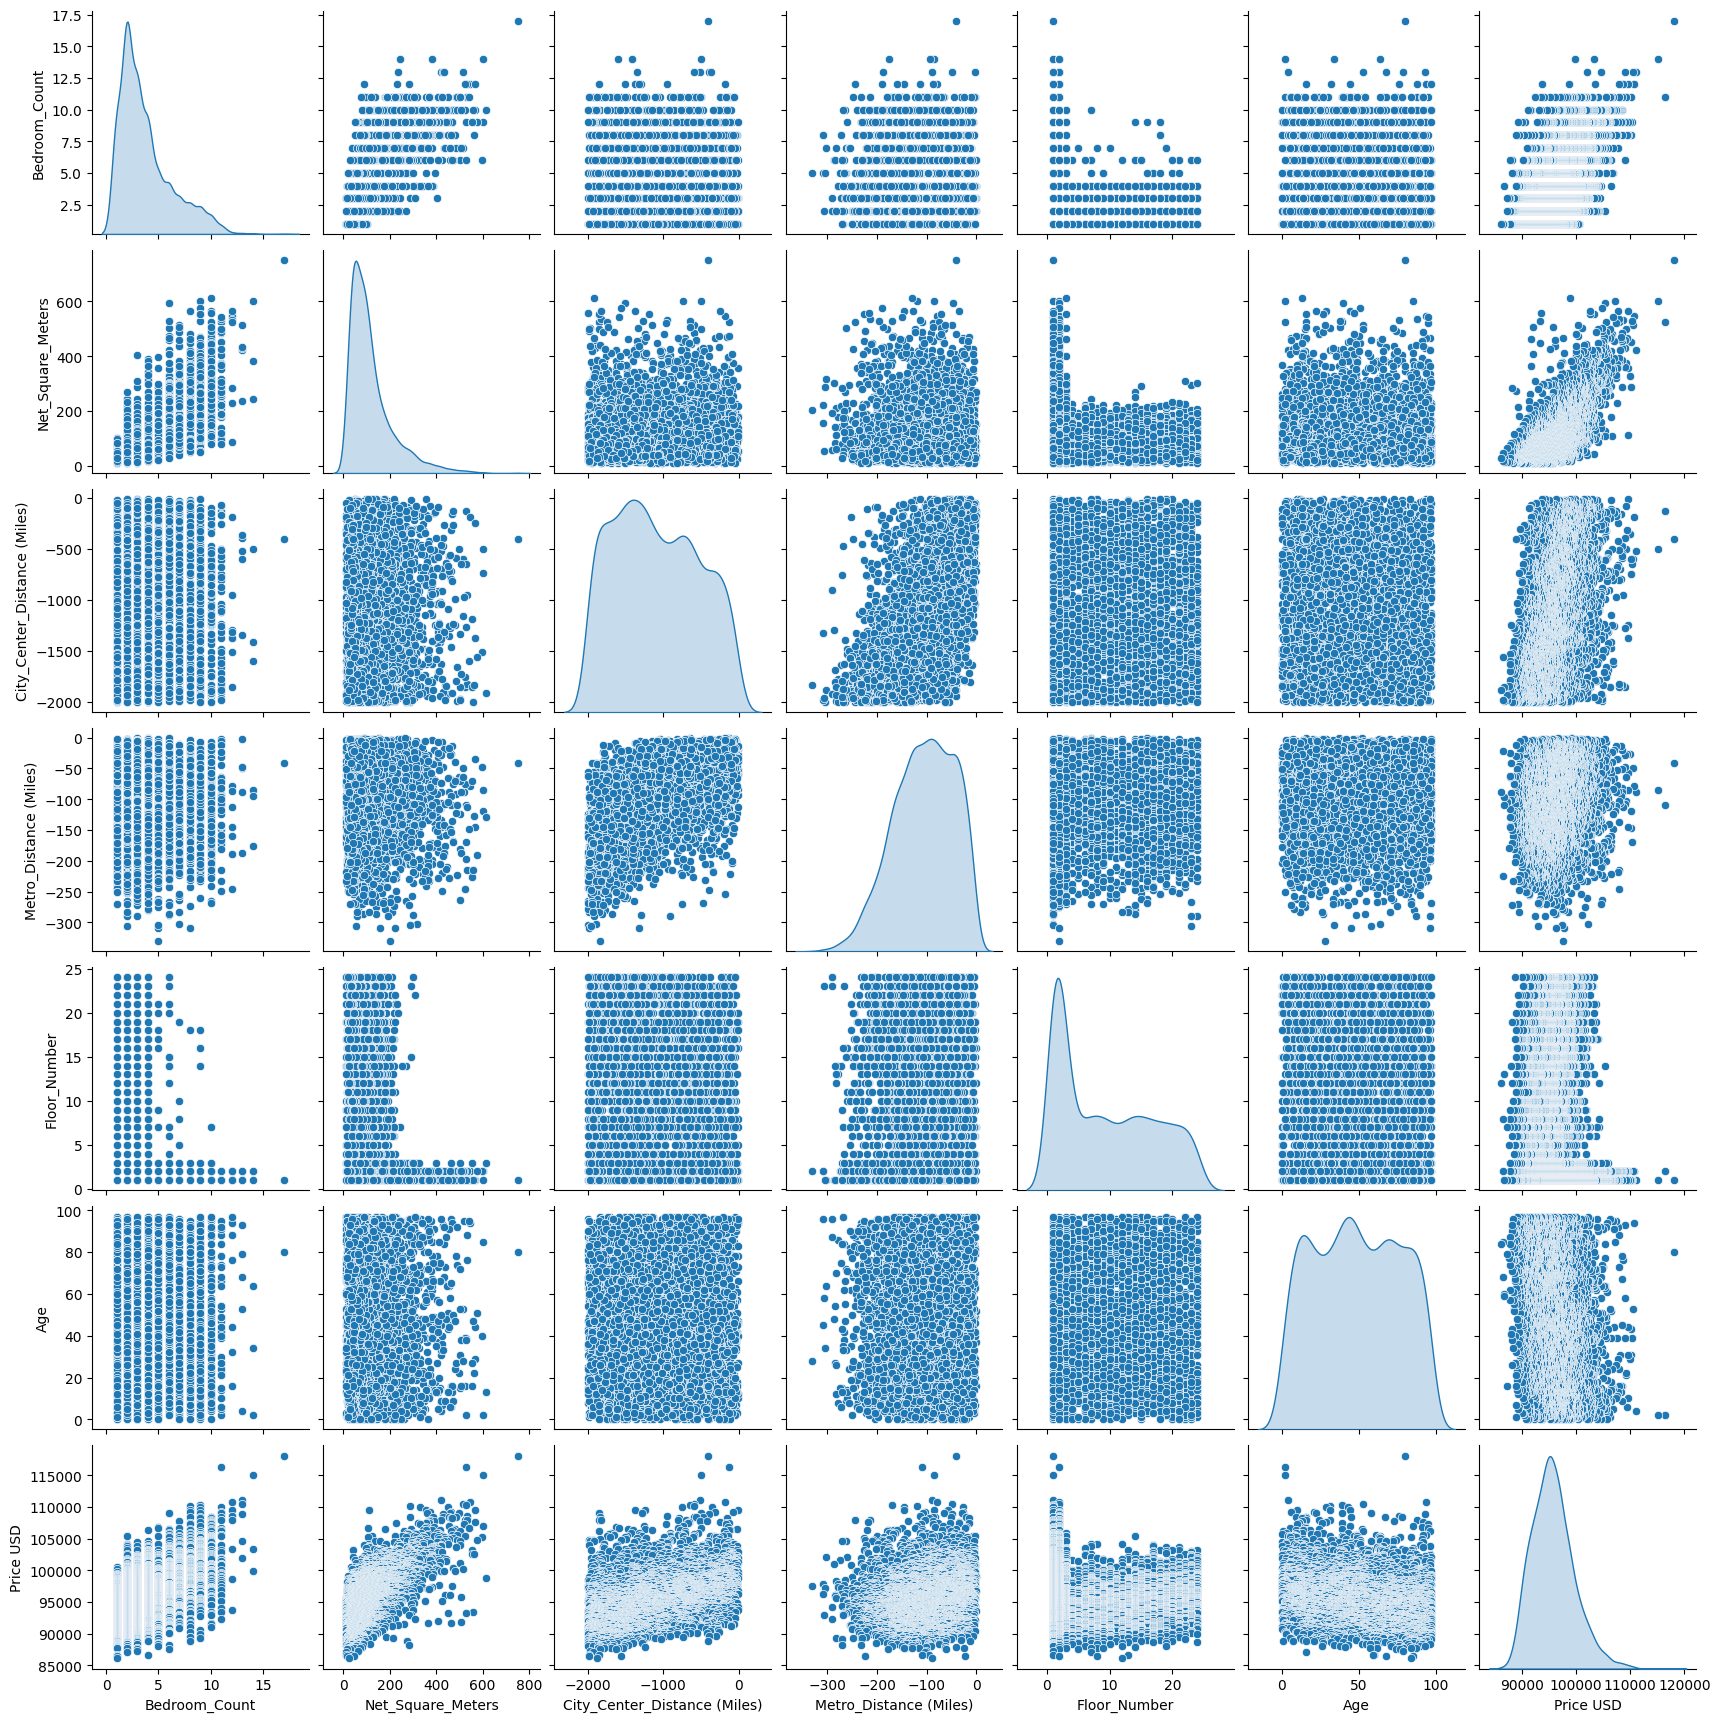

In [171]:
sns.pairplot(data, diag_kind='kde')
plt.show()


### Conclusion of Data Analysis

The data visualization and correlation matrix provide valuable insights into the relationships between features and their impact on property prices. A strong positive correlation (0.681) exists between Net Square Meters and Price USD, indicating that larger properties are generally more expensive. Similarly, Bedroom Count shows a positive correlation with price (0.552), meaning properties with more bedrooms tend to cost more, although this correlation is slightly weaker than that of property size. These findings align with market expectations, as property size and bedroom count are primary factors in determining value.

Interestingly, City Center Distance and Metro Distance show negative correlations with price (-0.418 and -0.146, respectively). This suggests that properties closer to the city center and metro stations are typically more expensive, likely due to the convenience and accessibility these locations offer. However, the weaker correlation with metro distance implies that proximity to the city center is a more significant factor for price than metro accessibility. Additionally, Age and Floor Number exhibit weak negative correlations with price (-0.225 and -0.136), indicating that older properties or those on higher floors tend to have slightly lower prices, possibly due to depreciation or buyer preferences.


My decision is to use all features in the linear regression model instead of focusing on just one. The scatterplots and pairplot, among all other data, show that house prices depend on many factors, such as Net Square Meters, Bedroom Count, Metro Distance, City Center Distance, Floor Number, and Age. Although some features, such as Net Square Meters show a strong positive correlation with price and other features like Metro Distance and City Center Distance show more complex or scattered relationship, these features still carry relevant information for the model, especially when considered in combination with other features. For example, larger properties that are closer to the city center could follow different pricing trends then smaller properties that are farther away. By including all of the different features the model can capture these nuanced interactions and better represent the complex dynamics of house prices.

Reliance on only one feature, such as Net Square Meters, overly simplifies the problem and risks introducing bias by excluding other critical factors. By including all relevant features, the model will be able to learn from the combined influence of these variables, improving its generalization capability and making more accurate predictions. Even features that have relatively weak individual correlations, such as Floor Number can add predictive value when combined with other features. This holistic approach reduces the likelihood of overlooking key drivers of house prices and allows the model to make more reliable and accurate predictions. Ultimately, leveraging all the features will provide a better understanding of the housing market and ensure that the model captures the full range of factors influencing property prices.

## Train Test Split and Modeling Objects and Training

Training Features Shape: (3446, 6)
Testing Features Shape: (862, 6)
Training Target Shape: (3446,)
Testing Target Shape: (862,)
Mean Absolute Error (MAE): 1519.2549876831356
Root Mean Squared Error (RMSE): 2204.2778459346096
First 10 Predicted Prices:
[99105.02458411 92245.88138428 92343.32579716 93258.73991359
 93812.23508044 99251.32068472 98774.75784981 99496.64034914
 90493.90531077 96404.2144174 ]
   Actual Price  Predicted Price
0     103693.51     99105.024584
1      90948.37     92245.881384
2      93094.53     92343.325797
3      94131.22     93258.739914
4      92312.55     93812.235080


/Users/cwq/coding-with-qiskit/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


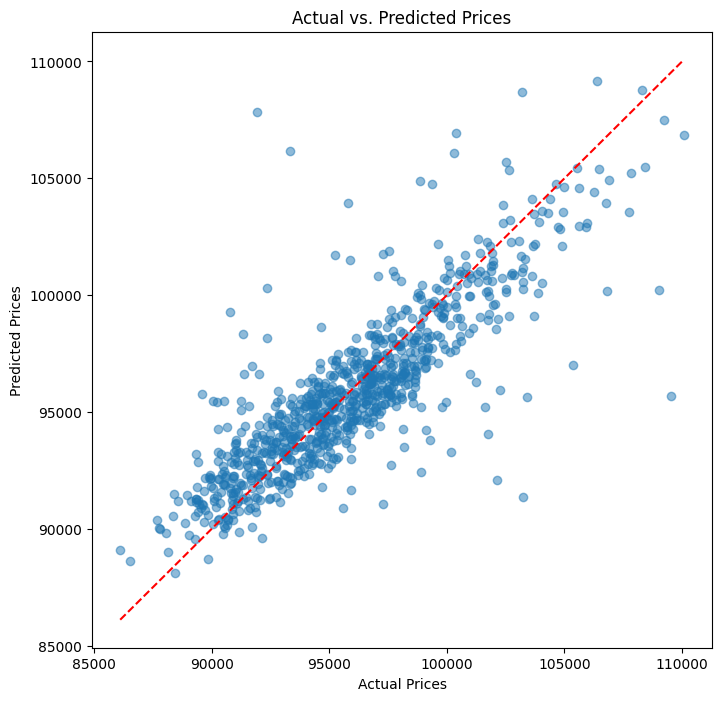

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = data.drop(columns=['Price USD'])  # Use all columns except 'Price USD'
y = data['Price USD']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

print("First 10 Predicted Prices:")
print(y_pred[:10])


comparison = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})
print(comparison.head())

# Visualize actual vs predicted prices
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


## K means model

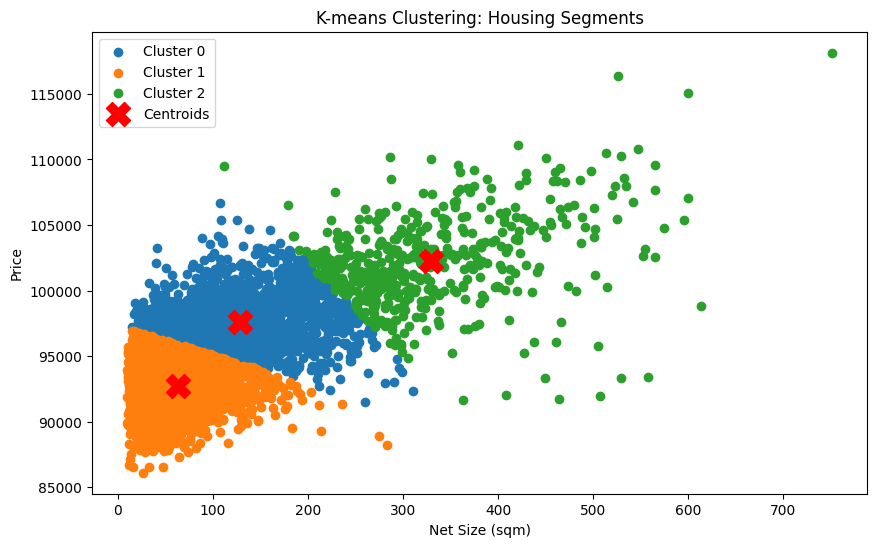

In [173]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

hypothesis_features = data[['Net_Square_Meters', 'Price USD']]

scaler = StandardScaler()
hypothesis_features_scaled = scaler.fit_transform(hypothesis_features)

kmeans_hypothesis = KMeans(n_clusters=3, random_state=42)
data['Cluster_Hypothesis'] = kmeans_hypothesis.fit_predict(hypothesis_features_scaled)

cluster_centers_hypothesis = scaler.inverse_transform(kmeans_hypothesis.cluster_centers_)

data[['Net_Square_Meters', 'Price USD', 'Cluster_Hypothesis']].head(), cluster_centers_hypothesis

cluster_labels = data['Cluster_Hypothesis'].values
cluster_centers = scaler.inverse_transform(kmeans_hypothesis.cluster_centers_)

# Visualization
plt.figure(figsize=(10, 6))

for cluster_id in range(cluster_centers.shape[0]):
    cluster_points = data[data['Cluster_Hypothesis'] == cluster_id]
    plt.scatter(
        cluster_points['Net_Square_Meters'],
        cluster_points['Price USD'],
        label=f'Cluster {cluster_id}'
    )

plt.scatter(
    cluster_centers[:, 0],  # net_sqm (size)
    cluster_centers[:, 1],  # price
    s=300, c='red', marker='X', label='Centroids'
)

plt.xlabel('Net Size (sqm)')
plt.ylabel('Price')
plt.title('K-means Clustering: Housing Segments')
plt.legend()
plt.show()

